# Basic transformations

Let's show some SpectroChemPy features on a group of IR spectra

In [1]:
import spectrochempy as scp
from spectrochempy import MASKED
from spectrochempy import DimensionalityError
from spectrochempy import error_

Running on GitHub Actions
MPL Configuration directory: /home/runner/.config/matplotlib
Stylelib directory: /home/runner/.config/matplotlib/stylelib


In [2]:
dataset = scp.read_omnic("irdata/nh4y-activation.spg")
dataset.y -= dataset.y[0]
dataset.y.title = "time"
dataset

NDDataset: [float64] a.u. (shape: (y:55, x:5549))

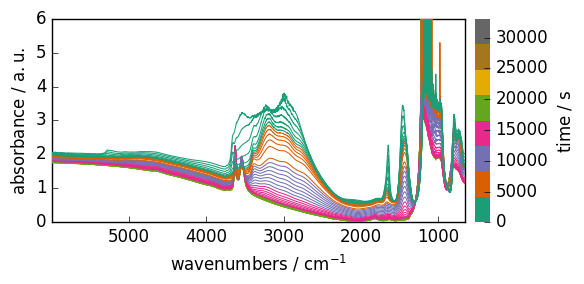

In [3]:
prefs = scp.preferences
prefs.figure.figsize = (6, 3)
prefs.colormap = "Dark2"
prefs.colorbar = True
ax = dataset.plot()

## Masking data

if we try to get for example the maximum of this dataset, we face a problem due to the saturation around
1100 cm$^{-1}$.

In [4]:
dataset.max()

<Quantity(6.0, 'absorbance')>

One way is to apply the max function to only a part of the spectrum (using [slicing](slicing.rst)). Another way is to
mask the undesired data.

Masking values in this case is straightforward. Just set a value `masked` or True for those data you want to mask.

In [5]:
dataset[:, 1290.0:890.0] = MASKED
# note that we specify floating values in order to sect wavenumbers, not index.

Here is a display the figure with the new mask

<Matplotlib Axes object>

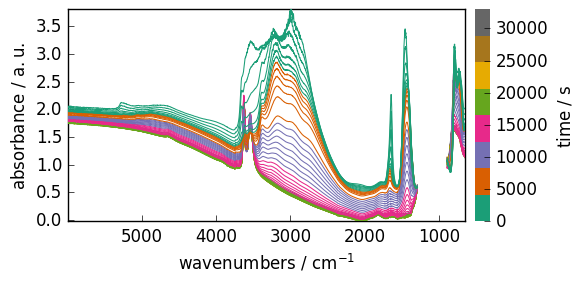

In [6]:
dataset.plot_stack()

Now the max function return the  maximum in the unmasked region, which is exactly what we wanted.

In [7]:
dataset.max()

<Quantity(3.80806017, 'absorbance')>

To clear this mask, we can simply do:

<Matplotlib Axes object>

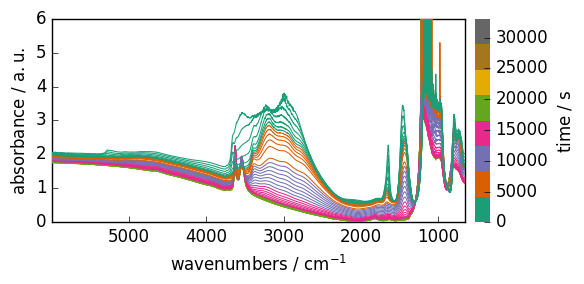

In [8]:
dataset.remove_masks()
dataset.plot()

## Transposition

Dataset can be transposed

In [9]:
dataset[:, 1290.0:890.0] = MASKED  # we mask the unwanted columns
t_dataset = dataset.T
t_dataset

NDDataset: [float64] a.u. (shape: (x:5549, y:55))

As it can be observed the dimension `x`and `y`have been exchanged, *e.g.* the original shape was **(x: 5549, y: 55)**,
and after transposition it is **(y:55, x:5549)**.
(the dimension names stay the same, but the index of the corresponding axis are exchanged).

Let's visualize the result:

<Matplotlib Axes object>

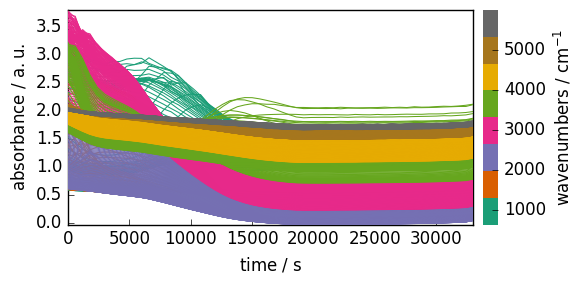

In [10]:
t_dataset.plot()

## Changing units

Units of the data and coordinates can be changed, but only towards compatible units. For instance, data are in
absorbance units, which are dimensionless (**a.u**). So a dimensionless units such as **radian** is allowed,
even if in this case it makes very little sense.

In [11]:
dataset.units = "radian"

<Matplotlib Axes object>

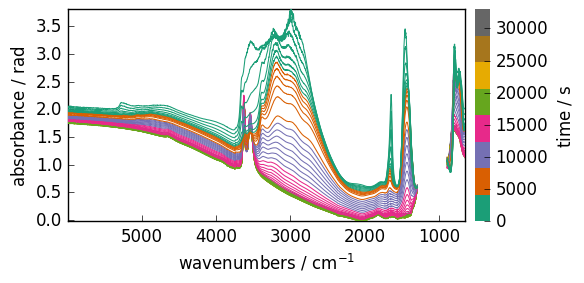

In [12]:
dataset.plot()

Trying to change it in 'meter' for instance, will generate an error!

In [13]:
try:
    dataset.to("meter")
except DimensionalityError as e:
    error_(DimensionalityError, e)

 ERROR | DimensionalityError: Cannot convert from 'radian' (dimensionless) to 'meter' ([length])


If this is for some reasons something you want to do, you must for the change:

In [14]:
d = dataset.to("meter", force=True)
d.units

 units forced to change


<Unit('meter')>

When units are compatible there is no problem to modify it. For instance, we can
change the `y` dimension units (
Time) to hours. Her we use the inplace transformation `ito` .

<Matplotlib Axes object>

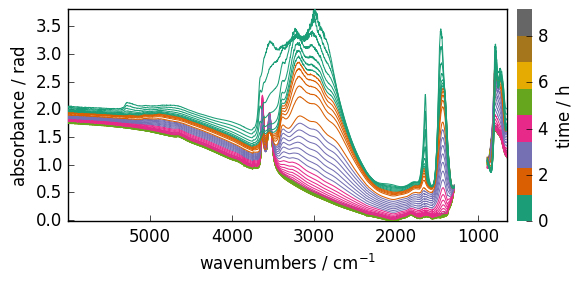

In [15]:
dataset.y.ito("hours")
dataset.plot()

See [Units](../objects/dataset/dataset.ipynb#Units) for more details on these units operations